# Machine Learning: Basic Principles 2018
# Round 2 - Regression

## Learning goals

In this exercise you will learn how to use **linear regression**, in order to predict a quantity of interest based on data. The implementation of linear regression amounts to the minimization of a function (**the empirical risk**) which measures the error of a predictor when applied to training data. You will hear about **gradient descent (GD)** which is a simple but powerful algorithm for finding the minimum of a function. Variations of GD are the main algorithmic tools behind many state-of-the art machine learning methods (such as deep learning). 
A good understanding of GD is therefore a worthy asset for an ML engineer. Expanding the basic linear regression model you will learn some additional techniques such as **feature scaling** (or **data normalization**) 
and **feature mapping** to obtain **polynomial regression**. 

(Hint: Completing this exercise will help you in future rounds where you might 
reuse substantial parts of the code developed in this exercise.)

    
### Keywords

`Linear Regression`, `Gradient Descent (GD)`, `Mean Squared Error (MSE)`, `Empirical Risk Minimization (ERM)`, `Polynomial Regression`,`Data Visualization`

## 1 Introduction

In this exercise we will apply __linear regression__ to explore the dependencies between the two cryptocurrencies **Ethereum** and **Bitcoin**. In particular, we will try to __predict the price of the cryptocurrency Ethereum [2] from the price of the cryptocurrency Bitcoin [1]__.

> ### References
>(only background info, not required for completing the exercise)
>
>[1] Cointelegraph, 2013-2018. What is bitcoin? Here's everything you need to know. Blockchains, bubbles and the future of money. https://www.cnet.com/how-to/what-is-bitcoin/ [Accessed 13th May 2018].
>
>[2] Jaffe, J., 2018. What is Ethereum. Guide for Beginners. https://cointelegraph.com/ethereum-for-beginners/what-is-ethereum  [Accessed 13th May 2018].
>


## 2 The Data
In order to predict one currency from the other we start by looking at some historic data. The data is stored in two files; one file for each cryptocurrency:
* BTC-USD.csv (Bitcoin prices in US Dollar)
* ETC-USD.csv (Ethereum prices in US dollar)

These files contain time series of daily prices (in US dollar) and traded volumes of Bitcoin and 
Etherum throughout the last three years. The files can be found on the website https://finance.yahoo.com

The following code snippet provides you some basic tools for reading in the dataset stored in these files and how to visualize this data.

In [1]:
import pandas as pd # import Pandas library (and defining shorthand "pd") for reading and manipulating the data files
from matplotlib import pyplot as plt # import and define shorthand "plt" for library "pyplot" providing plotting functions
from IPython.display import display, HTML
import numpy as np   # import and define shorthand "np" for library "numpy" for advanced mathematical operations in python

#read in data from csv files 
#parse_dates function is used on Date-column to change them from string to date-object

df_bc = pd.read_csv("BTC-USD.csv",parse_dates=['Date']) 
df_eth = pd.read_csv("ETH-USD.csv",parse_dates=['Date']) 


## Show top rows of each file.
# function "display()" is Jupyter Notebook command to show multiple function outputs from one cell. 
display(HTML(df_bc.head(5).to_html(max_rows=5)))
display(HTML(df_eth.head(5).to_html(max_rows=5)))

## Plot original data to same figure
# Example of use: plt.plot(x,y)
plt.plot(df_bc.Date.values, df_bc.Close.values, label=("Bitcoin price (in USD)")) 
plt.plot(df_eth.Date.values, df_eth.Close.values, label=("Ethereum price (in USD)"))

## set up figure title and labels for x- and y-axis
plt.title(r'$\bf{Figure\ 1.}$ Bitcoin vs Ethereum')
plt.xlabel('date')
plt.ylabel('price')

## rotate x-ticks by 20 degrees
plt.xticks(rotation=20)

## enable legend-box for plot labels
plt.legend()

## show the plot
plt.show()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,278.000000,279.600006,274.279999,277.890015,277.890015,11919665
1,2015-08-07,277.890015,278.920013,257.420013,258.600006,258.600006,22308123
2,2015-08-08,258.600006,266.750000,258.559998,263.869995,263.869995,15154749
3,2015-08-09,263.869995,266.630005,260.519989,263.299988,263.299988,12873441
4,2015-08-10,263.299988,269.899994,261.440002,269.029999,269.029999,13681939


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,0.6747,3.0,0.6747,3.00,3.00,371
1,2015-08-07,3.0000,3.0,0.1500,1.20,1.20,1438
2,2015-08-08,1.2000,1.2,1.2000,1.20,1.20,0
3,2015-08-09,1.2000,1.2,1.2000,1.20,1.20,0
4,2015-08-10,1.2000,1.2,0.6504,0.99,0.99,7419


<Figure size 640x480 with 1 Axes>

## 3 Exercise

Our ML problem involves data points $\mathbf{z}$ which contain all parameters of the two cryptocurrencies Bitcoin and Ethereum at a particular day. As the feature $x$ of a data point $\mathbf{z}$ we choose the closing price of Bitcoin on a particular day, while the label $y$ is the Ethereum closing price.

The actual exercise starts from here and it has been divided into 6 tasks:

* 3.1 Getting Hands on the Data
* 3.2 Scatterplots
* 3.3 Linear Regression
* 3.4 Polynomial Regression
* 3.5 Gradient Descent

Your task is to fill in `...` under `### STUDENT TASK ###` in each step.

## 3.1 Getting Hands on the Data

In order to learn (or find) a good predictor $h(x)$ which approximates the Ethereum closing price $y$ based on the Bitcoin closing price $x$, we make use of the data stored in the two csv files, `BTC-USD.csv` and `ETC-USD.csv`. In particular, these files provide us with a labeled dataset $\mathcal{X} = \{(x^{(i)},y^{(i)} \}_{i=1}^{N}$. The dataset $\mathcal{X}$ contains $N$ data points $z^{(i)}$, for $i=1,\ldots,N$, with the features $x^{(i)}$ which we define as the closing price of Bitcoin at day $i$. The quantity of interest (the label) $y^{(i)}$ of the $i$-th data point is the closing price of Ethereum at day $i$. We would like to predict the Ethereum closing price $y^{(i)}$ solely from the Bitcoin closing price $x^{(i)}$ on the same day.


As evident from Figure 1, comparing the closing prices of Bitcoin and Ethereum is difficult visually because of the significantly different value ranges of Bitcoin and Ethereum prices. Therefore, in order to facilitate a better intuition for the relation between the two currencies, we will normalize the prices to the same value range [3]:

\begin{equation}
\label{scale_features_labels}
\tag{1}
 x^{(i)}_{\rm scaled} = \frac{x^{(i)}-\min_{i} x^{(i)}}{\max_{i} x^{(i)}-\min_{i} x^{(i)}}, 
   y^{(i)}_{\rm scaled} = \frac{y^{(i)}-\min_{i} y^{(i)}}{\max_{i} y^{(i)}-\min_{i} y^{(i)}}
\end{equation}


The normalization results in having the same value range [0,1] for both currencies.

> ### References
> 
> [3] Feature Scaling. In Wikipedia. https://en.wikipedia.org/wiki/Feature_scaling#Methods [Accessed 13th June 2018].
>

### Tasks:
1. Read in the closing prices of Ethereum and Bitcoin (stored in column with the caption "Close") from the csv files
2. Preprocess the data
    1. Normalize \eqref{scale_features_labels} Bitcoin prices from column called __Close__ and save them into a variable `bitcoin`.
    2. Normalize \eqref{scale_features_labels} Ethereum prices from column called __Close__ and save them into a variable `ethereum`.
4. Create a **Figure 2** which depicts the time series of rescaled prices. 

The following code snippet imports all Python libraries which are required for this exercise.

In [12]:
# import all libraries to be used in this exercise

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display

In [13]:
def solution1():
    # We assign Global variables for testing purposes
    global df_bc, df_eth, bitcoin, ethereum, axis, best_alpha
    # read in historic Bitcoin and Ethereum statistics data from the files "BTC-USD.csv" and "ETH-USD.csv"

    df_bc = pd.read_csv("BTC-USD.csv", parse_dates=['Date'])
    df_eth = pd.read_csv("ETH-USD.csv", parse_dates=['Date'])

    # read the dates for the individual records from column "Date"
    bitcoin_date = df_bc.Date.values
    ethereum_date = df_eth.Date.values

    ### STUDENT TASK ###
    ## read in closing prices for Bitcoin and Ethereum from the column "Close" and computed the rescaled values  
    ## Replace '...' with your solution.
    bitcoin_close_values = df_bc.Close.values
    ethereum_close_values = df_eth.Close.values
    
    max_bitcoin, min_bitcoin = bitcoin_close_values.max(), bitcoin_close_values.min()
    max_ethereum, min_ethereum = ethereum_close_values.max(), ethereum_close_values.min()
    
    bitcoin = (bitcoin_close_values - min_bitcoin)/(max_bitcoin - min_bitcoin)
    ethereum = (ethereum_close_values - min_ethereum)/(max_ethereum - min_ethereum)

    # Show cryptocurrency prices over transaction date
    axis = plt.gca()
    plt.plot(bitcoin_date,bitcoin, label=("Bitcoin")) 
    plt.plot(ethereum_date,ethereum, label=("Ethereum"))
    plt.title(r'$\bf{Figure\ 2.}$ Normalized cryptocurrency prices')
    plt.xlabel('Date')
    plt.ylabel('Normalized price')
    plt.xticks(rotation=20)
    plt.legend()

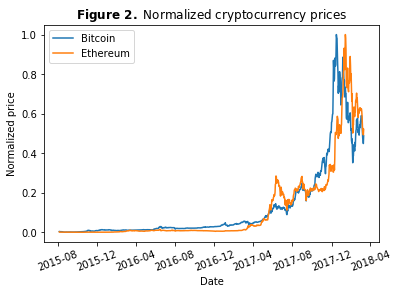

In [4]:
solution1()
assert len(bitcoin) == 948,"Your bitcoin data is incorrect length"
assert len(ethereum) == 948, "Your ethereum data is incorrect length"
assert np.max(bitcoin) == np.max(ethereum), "Incorrect max values after normalisation"
assert np.min(bitcoin) == np.min(ethereum), "Incorrect min values after normalisation"

# Run test that check that plot renders correctly. Requires plotchecker to be installed.
from plotchecker import LinePlotChecker
pc = LinePlotChecker(axis)
pc.assert_num_lines(2)
pc.find_permutation('title',r'$\bf{Figure\ 2.}$ Normalized cryptocurrency prices')
pc.find_permutation('xlabel','Date')
pc.find_permutation('ylabel','Normalized price')
pc.assert_labels_equal(['Bitcoin','Ethereum'])

## 3.2 Scatterplots

Scatter plots are a helpful tool for getting an idea of the relation between features and labels. 
 
### Task:
1. Generate a scatter plot using the Python function `plt.scatter()`. The x-axis of the scatter plot represents the values of the rescaled Bitcoin prices $x_{\rm scaled}^{(i)}$ and y-axis represents the values of the rescaled Ethereum prices $y_{\rm scaled}^{(i)}$.

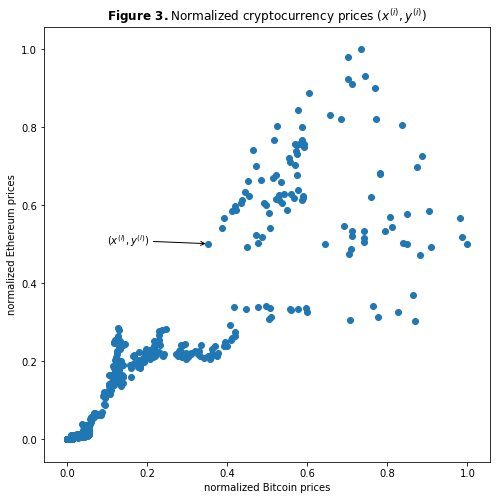

In [14]:
### STUDENT TASK ###
x = bitcoin
y = ethereum

plt.figure(figsize=(8, 8))
plt.scatter(x,y)
plt.title(r'$\bf{Figure\ 3.}$Normalized cryptocurrency prices ($x^{(i)},y^{(i)}$)')
plt.xlabel('normalized Bitcoin prices')
plt.ylabel('normalized Ethereum prices')
plt.annotate('$(x^{(i)},y^{(i)})$', xy=(x[913], y[913]), xytext=(0.1, 0.5),
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            )
axis = plt.gca()

In [15]:
# Check that plot is a scatterplot. Requires plotchecker
from plotchecker import ScatterPlotChecker
pc = ScatterPlotChecker(axis)
assert len(pc.x_data) == 948
assert len(pc.y_data) == 948

## 3.3 Linear Regression 

Our goal is to predict the closing price $y^{(i)}$ of Ethereum at some day $i$ based on the Bitcoin closing price $x^{(i)}$ on the very same day. Within linear regression, we try to do this prediction using linear functions which belong to the hypothesis space

\begin{equation*}
 \mathcal{H} = \{h^{(\mathbf{w})}(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} \mbox{ for some } \mathbf{w} \in \mathbb{R}\}.
\label{eq1}
\tag{1}
\end{equation*}

In particular, we try to predict (or approximate) $y^{(i)}$ by the function value $h^{(\mathbf{w})}(\mathbf{x}^{(i)}) = \mathbf{w}^{T}\mathbf{x}^{(i)}$ using the augmented feature vector $\mathbf{x}^{(i)} = (x^{(i)},1)^{T}$. At first sight, it seems strange to add a constant one to each feature value $x^{(i)}$ (which is the closing price of Bitcoin at day i). However, it will turn out to allow for a larger class of functions $h^{(\mathbf{w})}$ which can be used for the prediction.

The prediction $h^{(\mathbf{w})}(\mathbf{x}^{(i)})$ will typically incur a non-zero __prediction error__ $y^{(i)} - h^{(\mathbf{w})}(\mathbf{x}^{(i)})$, which we quantify using its square $(y^{(i)} - h^{(\mathbf{w})}(\mathbf{x}^{(i)})^2$ (squared error loss). Since we have $N$ data points $(x^{(i)},y^{(i)})$ available, we can compute the __empirical risk__ (average loss)
\begin{equation*}
 \mathcal{E} (\mathbf{w}) = \frac{1}{N}\sum^{N}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2.
\label{eq2}
\tag{2}
\end{equation*}


Our goal is to find the optimal predictor $h_{\rm opt}(\cdot)$: 
\begin{equation}
h_{\rm opt}(\cdot) = \underset{{h(\mathbf{w})} \in \mathcal{H}}{\operatorname{argmin}} \mathcal{E} (\mathbf{w}).
\label{eq3}
\tag{3}
\end{equation}

Note that every function $h^{(\mathbf{w})}(\mathbf{x}) \in \mathcal{H}$ corresponds to a particular choice of the weight vector $\mathbf{w} \in \mathbb{R}^{2}$. This allows us to rewrite the optimization problem (Eq. \ref{eq3}) as an optimization problem for the weight vector: 
\begin{align}
\mathbf{w}_{\rm opt} &= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \{ \frac{1}{N}\sum^{N}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2 \}\\
&= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \frac{1}{N} {||\mathbf{y}-\mathbf{X}\mathbf{w}||}_2^2,
\label{eq4}
\tag{4}
\end{align}
where
\begin{align}
\mathbf{X} = \big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(N)}\big)^{T} \text{and }\mathbf{y} = \begin{bmatrix}y^{(1)}\\\vdots\\y^{(n)}\end{bmatrix}\ \mathbf{X} \in \mathbb{R}^{N \times 2},\mathbf{y}\in\mathbb{R}^{N}.
\end{align}
An optimal weight vector $\mathbf{w}_{\rm opt}$ solving \eqref{eq4} induces an optimal predictor $h_{\rm opt}= h^{(\mathbf{w}_{\rm opt})}$ which solves \eqref{eq3}. 

Whenever the matrix $\mathbf{X}^T \mathbf{X}$ is invertible, the solution of (\ref{eq4}), i.e., the optimal weight which minimizes the empirical risk, is obtained as 
\begin{align}
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}.
\label{eq5}
\tag{5}
\end{align}


### Tasks
0. Implement a Python function `featureMatrix(x)` which takes a length-$N$ vector of Bitcoin closing prices $x^{(i)}$, for $i=1,\ldots,N$ as input and outputs the feature matrix $\mathbf{X}=\big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(N)}\big)^{T} \in \mathbb{R}^{N \times 2}$ whose rows are the augmented feature vectors $\mathbf{x}^{(i)} = \big(x^{(i)},1\big)^{T} \in \mathbb{R}^{2}$. 
1. Implement a Python function `fit(X,y)` that takes feature matrix $\mathbf{X}$ and label vector $\mathbf{y}$ as inputs and returns the optimal weight vector according to (Eq. \ref{eq5}.) 
2. Implement a Python function `predict(X,w)` that takes the feature matrix $\mathbf{X}$ and weight vector $\mathbf{w}$ as input and returns a vector containing the predicted labels according to (Eq. \ref{eq1}.)
3. Implement a Python function `empirical_risk(X, y, w)` taking feature matrix $\mathbf{X}$, label vector $\mathbf{y}$ and weight vector $\mathbf{w}$ and returns the empirical error (Eq. \ref{eq2}).
4. Implement a Python function `linearRegression(X,y)` which outputs the empirical error of your prediction and the optimal weight vector
    * Modify our feature matrix and label vector by adding a dummy feature (i.e. 1). This can be done by using helper functions `featureMatrix(x)` and `labelVector(y)`
    * use these modified $\mathbf{X}$ and $\mathbf{y}$ to fit the data and calculate the empirical error using the Python functions that you defined in previous steps.
5. Execute the cell. You should see a plot similar to $\bf{Figure\ 3.}$, but with a legend showing the empirical error and your prediction line in red.

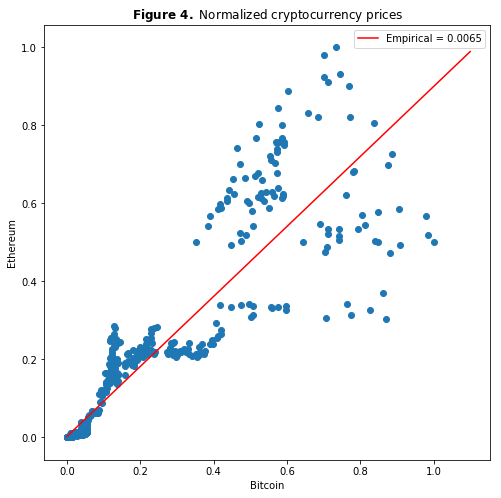

In [16]:
def featureMatrix(x):
    # Generate x_i = (x_i, 1) feature matrix
    N = len(x)
    reshaped_x = x.reshape(N, 1)
    x_i = np.insert(reshaped_x, 1, 1, axis = 1)
    return x_i

def fit(x, y):
    ### STUDENT TASK ### 
    ## Compute optimal w by replacing '...' with your solution.
    ## Hints: Check out numpy's linalg.inv(), dot() and transpose() functions.
    x_transpose = np.transpose(x)
    x_symmetric = np.dot(x_transpose, x)
    x_symmetric_inverse = np.linalg.inv(x_symmetric)

    w_opt = np.dot(np.dot(x_symmetric_inverse, x_transpose), y)
    return w_opt

# Predict new y data
# return numpy.ndarray:
#      [ [y_pred_1]
#          ....
#        [y_pred_N]]
def predict(X, w_opt):
    ### STUDENT TASK ###
    ## Predict new y data by replacing '...' with your solution.
    ## Hint! Use X and w_opt to get necessary matrices.
    x_transposed = np.transpose(X)
#     y_pred = np.dot(w_opt, x_transposed)
    y_pred = np.dot(X, w_opt)
    return y_pred

# Calculate empirical error of the prediction
# return float
def empiricalRisk(X, Y, w_opt):
    ### STUDENT TASK ###
    ## Compute empirical error by replacing '...' with your solution.
    ## Hints! Use X, Y and w_opt to get necessary matrices.
    ##        Check out numpy's dot(), mean(), power() and subtract() functions.
    sum = np.power((Y - predict(X, w_opt)), 2)
    return np.mean(sum)

def labelVector(y):
    # Reshape y to ensure correct behavior when doing matrix operations
    return np.reshape(y,(len(y),1))
    
def linearRegression(x, y):
    ### STUDENT TASK ###
    ## Calculate X, Y, w_opt and empirical_error
    ## Hints! Use featureMatrix() and labelVector() to get necessary matrices, X and Y.
    # X = ... 
    # Y = ...
    # w_opt=...
    # empirical_error=...
    # YOUR CODE HERE
    x_feature = featureMatrix(x)
#     y_reshaped = labelVector(y)
    w_opt = fit(x_feature, y)
    empirical_error = empiricalRisk(x_feature, y, w_opt)
    return w_opt, empirical_error

# w_opt, empirical_error = linearRegression(x, y)
# print(w_opt)
# print(empirical_error)

def draw_plot(x, y, title=''):
    w_opt, empirical_error = linearRegression(x, y)
    x_pred = np.linspace(0,1.1,100)
    y_pred = predict(featureMatrix(x_pred), w_opt)
    # Plot data points and linear regression fitting line
    plt.figure(figsize = (8, 8))
    plt.scatter(x, y)
    plt.plot(x_pred, y_pred,'r', label=("Empirical = %.4f" % empirical_error))
    plt.title(title)
    plt.xlabel('Bitcoin')
    plt.ylabel('Ethereum')
    plt.legend()
    axis = plt.gca()

    
######### Linear regression model for x and y data #########
draw_plot(x, y, r'$\bf{Figure\ 4.}$ Normalized cryptocurrency prices')

In [17]:
w_opt, empirical_error = linearRegression(x, y)
assert empirical_error < 0.015
w_opt, empirical_error = linearRegression(np.array([0,1,2,3]), np.array([0,1,2,3]))
# Because of computational rounding errors, empirical error is almost never exactly 0
assert empirical_error < 1e-30


## 3.4 Polynomial Regression

By looking at $\bf{Figure\ 3.}$ we see that relation between label $y$ (Ethereum price) and feature $x$ (Bitcoin price) is highly non-linear. Therefore it is useful to consider a hypothesis space which is constituted by polynomial functions
\begin{equation}
\label{equ_def_poly_hyposapce}
\mathcal{H}^{(d)}_{\rm poly} = \{ h^{(\mathbf{w})}(\cdot): \mathbb{R} \rightarrow \mathbb{R}: h^{(\mathbf{w})}(x) = \sum_{r=1}^{d} w_{r} x^{r-1} \mbox{, with some } \mathbf{w} =(w_{1},\ldots,w_{d})^{T} \in \mathbb{R}^{d} \}.
\end{equation}  

As in task `3.3 Linear Regression`, the quality of a predictor is measured by the squared error loss and linear regression amounts to minimizing the  average squared error loss (mean squared error):
\begin{equation} 
\min_{h \in \mathcal{H}_{\rm poly} } \frac{1}{N} \sum_{i=1}^{d} (y^{(i)} - h^{(\mathbf{w})}(x^{(i)}))^{2} \mbox{, where } h^{(\mathbf{w})}(x)=\sum_{r=1}^{d} w_{r} x^{r-1}.
\end{equation} 

As discussed in the course book (Section 3.2 "Polynomial Regression") polynomial regression is equivalent to combining linear regression with a feature map. In particular, we transform the features $x$ (Bitcoin closing price) of the data points to a higher dimensional feature space using the feature map 

\begin{equation}
\phi(x) = (x^{d-1},..,x^1, x^0)^{T} \in \mathbb{R}^{d}.
\label{eq7}
\tag{7}
\end{equation}

This feature map takes the original feature $x \in \mathbb{R}$ (the Bitcoin closing price) as input and returns a new feature vector $\mathbf{x}= \phi(x) \in \mathbb{R}^{d}$ of length $d$. The resulting feature matrix is  
\begin{equation*}
    \mathbf{X}_{poly}=\begin{bmatrix}
        (x^{(1)})^{d-1} & \dots & (x^{(1)})^{1}& (x^{(1)})^{0}\\
        (x^{(2)})^{d-1} & \dots & (x^{(2)})^{1}& (x^{(2)})^{0}\\
      \vdots & \ddots& \vdots & \vdots\\
       (x^{(N-1)})^{d-1} & \dots & (x^{(N-1)})^{1}& (x^{(N-1)})^{0}\\
      (x^{(N)})^{d-1} & \dots & (x^{(N)})^{1}& (x^{(N)})^{0}
    \end{bmatrix}.
\label{eq8}
\tag{8}
\end{equation*}

Polyonimal regression is then nothing but linear regression with the tranformed feature vectors $\mathbf{x}^{(i)} = \phi(x^{(i)})$, with $x^{(i)}$ being the Bitcoin closing price at day $i$. 

### Tasks

1. Implement a Python function `feature_mapping(x,d)` which reads in vector of feature values $x^{(i)}$ of dataset $\mathcal{X}$ and returns the feature matrix \eqref{eq8} with given degree $d$ (by default $d=2$). 
2. Implement a Python function `polynomialRegression(x,y,degree=1)` which is based on the following steps 
    * use `feature_mapping(x,d)` to obtain the feature matrix \eqref{eq8}
    * compute the optimal weight vector `w_opt` by inserting the feature matrix \eqref{eq8} into (5)
    * use weight vector to computed predictions $\hat{y}$ for the labels $y$
    * compute the empirical risk obtained when predicting the labels in the dataset $\mathcal{X}$ 
3. Generate a scatter plot of the dataset $\mathcal{X}$ which includes also the optimal polynomial predictor as a red curve by executing the cell


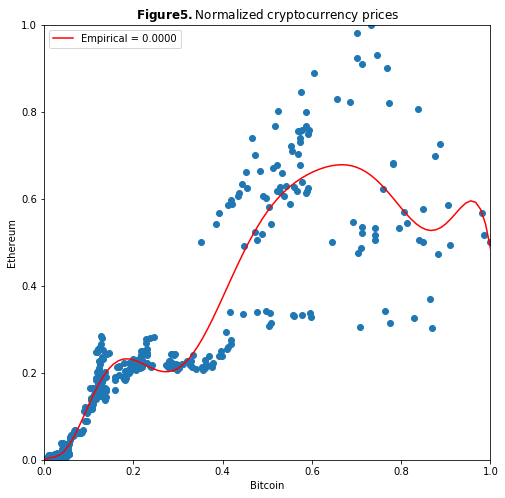

In [21]:
# Extract feature to higher dimensional by computing feature mapping
# return numpy.ndarray with following mappings:
#      [[x_1^(d), x_1^(d-1), x_1^(d-2), ... , x_1^(0)]
#        ...         ...        ...     ...     ... 
#       [x_N^(d), x_N^(d-1), x_N^(d-2), ... ,x_N^(0)]]
def feature_mapping(x, degree = 1):
    ### STUDENT TASK ####
    ## Compute specified feature mapping by replacing '...' with your solution.
    ## Hints! Use x to get all the feature vectors of the data set.
    ##        Check out numpy's vstack(), hstack() and column_stack() functions.
    # polynomial_features = ...
    # YOUR CODE HERE
    x = np.reshape(x, (len(x), 1))
    polynomial_features = np.power(x, degree)
    
    for d in range(degree - 1, -1, -1):
        powered_x = np.power(x, d)
        polynomial_features = np.column_stack((polynomial_features, powered_x))
        
    return polynomial_features

# Linear regression model for feature mapping.
def polynomialRegression(x, y, degree = 1):
    ### STUDENT TASK ###
    ## Calculate w_opt, empirical_error, X and Y
    # X = ...
    # Y = ...
    # w_opt=...
    # empirical_error=...
    # YOUR CODE HERE
    feature_matrix = featureMapping(x, degree)
    w_opt = fit(feature_matrix, y)
    empiricalRisk(feature_matrix, y, w_opt)
    return w_opt, empirical_error

def drawPlot(x, y, title='', degree=1):
    w_opt, empirical_error = polynomialRegression(x, y, degree)
    
    # Change feature values into continues one from 0 to 1.
    x_pred = np.linspace(0,1.1,100)
    
    # predict new y values using feature mapping
    y_pred = predict(feature_mapping(x_pred, degree), w_opt)

    # Plot data points and linear regression fitting line
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(x_pred,y_pred,'r', label=("Empirical = %.4f" % empirical_error))
    plt.title(title)
    plt.xlabel('Bitcoin')
    plt.ylabel('Ethereum')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.show()

        
######### Linear regression model for x and y data #########
drawPlot(x,y,r'$\bf{Figure 5.}$Normalized cryptocurrency prices', degree = 11)

In [22]:
w_opt, empirical_error = polynomialRegression(x, y)
assert empirical_error < 0.01
w_opt, empirical_error = polynomialRegression([0,1,2,3], [0,1,2,3])
# Because of computational rounding errors, empirical error is almost never 0
assert empirical_error < 1e-30
for i in range(0,100):
    x_test = feature_mapping([0,1,2,3],i)
    assert x_test.shape == (4,1+i)

## 3.5 Gradient Descent

Recall `3.3 Linear Regression`, where the optimal predictor $h^{(\mathbf{w}_{\rm opt})}$ was found by minimizing empirical error $\mathcal{E}(\mathbf{w})$ using the closed-form solution 

\begin{align}
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y},
\label{eq5}
\tag{5}
\end{align}

with the matrix $\mathbf{X}$ containing the feature vectors $\mathbf{x}^{(i)}$ and the vector $\mathbf{y}$ containing 
the labels $y^{(i)}$ of the data points. There are two challenges with using the closed-form expression \eqref{eq5} to get the optimal weight vector $\mathbf{w}_{\rm opt}$: First, it only applies if the matrix $(\mathbf{X}^T \mathbf{X})$ is invertible (note that we have little control over the features as those are obtained from measurements). Second, inverting the matrix $\mathbf{X}^T \mathbf{X}$ might be computationally infeasible if we have a lot (billions) of features. Luckily, there is an alternative method for finding the optimal weight vector $\mathbf{w}_{\rm opt}$ which avoids these two challenges. In particular, this method is based on a very simple method for finding the minimum of a function: gradient descent **(GD)**. 

GD amounts to iteratively updating a current guess (or approximation) $\mathbf{w}^{(k)}$ for the optimal weight (which minimizes ([2](#mjx-eqn-eq2))) according to the rule:

\begin{equation*}
    \mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} - \alpha {\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w}^{(k)}).
    \label{eq10}
    \tag{10}
\end{equation*}
The choice of the step-size $\alpha$ is crucial for how quickly (and if at all) the iterates $\mathbf{w}^{(k)}$ converge to an optimal weight vector $\mathbf{w}_{opt}$ which yields smallest empirical risk (see `3.3 Linear Regression`). 

Note that the implementation of GD requires to compute the gradient ${\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w})$.
For linear regression and squared error loss this gradient is obtained as 

\begin{equation*}
{\nabla}_{\mathbf{w}}\mathcal{E} (\mathbf{w}) =-\frac{2}{N}\sum^{N}_{i=1}\mathbf{x}^{(i)}(y^{(i)} - {{\mathbf{w}}}^{T} \mathbf{x}^{(i)}) = -\frac{2}{N} \mathbf{X}^{T}(\mathbf{y}-\mathbf{X} \mathbf{w}).
\label{eq11}
\tag{11}
\end{equation*}

GD is started by initalizing the weight vector $\mathbf{w}$ to some value, either randomly or setting $\mathbf{w}^{(0)}=\big(0,\dots,0\big)^{T}$ and then repeating the GD update \eqref{eq10} until some termination criterion is met. Two simple options for the termination criterion are: (i) using a fixed number of iterations or (ii) checking the decrease of the objective function and stopping when the decrease is below a threshold. 

It can shown that for a sufficiently small step size $\alpha$, GD always converges to the optimal weight vector $\mathbf{w}_{\rm opt}$, regardless of which inital guess $w^{(0)}$ has been used. The convergence speed depends crucially on the precise choice of the step size $\alpha$: If $\alpha$ is too large, the iterations may not converge at all while if $\alpha$ is too small, the convergence is unacceptably slow. 

### Tasks

1. Implement a Python function `gradient()` which computes the gradient according to (Eq. \ref{eq11}). This Python function requires as input a feature matrix $X$, label vector $y$ and returns a vector.
2. Complete Python function `gradient_descent()` which implements the GD update (Eq. \ref{eq10}). This Python function takes feature matrix $X$, label vector $y$ learning rate $\alpha$ and max iterations as inputs and outputs an array of empirical errors.
3. The code snippet below creates a figure entitled "$\bf{Figure\ 6.}$ Converge of GD" which depicts the convergence of GD for different values of the step-size (these different values are in variable `learning_rates`
4. Determine which learning rate yields fastest convergence and store in the variable `best_alpha` 
5. Create a $\bf{Figure\ 7.}$ which is identical fo $\bf{Figure\ 6.}$ except for the color coding of the curves (each curve corrsponds to one parituclar step size): the curve corresponding to `best_alpha` should be red and the remaining curves in blue. 

### Tips
* `empirical_risk()` and `X`, `Y` -variables are same as in `linearRegression()`!

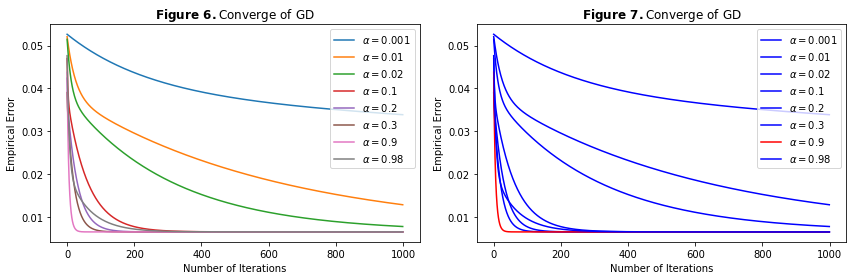

In [23]:
# Compute gradient
# return numpy.ndarray:
#      [ [w_1]
#          ....
#        [w_d]]
def gradient(X, Y, w):
    N = X.shape[0]
    ### STUDENT TASK ###
    ## Compute gradient by replacing '...' with your solution.
    ## Hint! Use X and Y to get necessary matrices.
    # gradient = ...
    # YOUR CODE HERE
    X_transposed = np.transpose(X)
    final_matrix = np.dot(X_transposed, Y - np.dot(X, w))
    gradient = (-2 / N) * final_matrix
    return gradient

# Run GD for k steps
# a = alpha/learning rate
# k = iteration steps
# returns empirical error array with lenght k: [ Empirical_1, ..., Empirical_k ]
def gradient_descent(x, y, a, k):
    ### STUDENT TASK ###
    ## Hints! Same as in linearRegression()!
    X = featureMatrix(x)
    Y = np.reshape(y, (len(y), 1))
    # Initial weigth vector (all values 0)
    w = np.zeros((X.shape[1], Y.shape[1]))
    empirical_errors = []

    for i in range(k):
        # Calculate gradient
        grad = gradient(X, Y, w)

        ### STUDENT TASK ###
        ## Update weight vector by replacing '...' with your solution.
        w = w - a*grad

        ### STUDENT TASK ###
        # Calculate Empirical Risk and append the error into empirical_errors array
        empirical_errors.append(empiricalRisk(X, Y, w))
    
    return empirical_errors
    
def visualize_error(x, y, learning_rates, best_alpha = None):
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))

    for learning_rate in learning_rates:
        # Plot Error against Step Size
        GD_converge = gradient_descent(x, y, learning_rate, 1000)   
        axes[0].plot(GD_converge, label = (r'$\alpha=$' + str(learning_rate))) 

    axes[0].set_xlabel('Number of Iterations')
    axes[0].set_ylabel('Empirical Error')
    axes[0].legend(loc=0)
    axes[0].set_title(r'$\bf{Figure\ 6.}$Converge of GD')
    
    for learning_rate in learning_rates:
        # Plot Error against Step Size.
        # Now mark the best converge in red. Use value from best as a correct step size.
        GD_converge = gradient_descent(x, y, learning_rate, 1000)

        if learning_rate == best_alpha:
            axes[1].plot(GD_converge, label = (r'$\alpha=$' + str(learning_rate)), color="red")
        else:
            axes[1].plot(GD_converge, label = (r'$\alpha=$' + str(learning_rate)), color="blue")
    
    axes[1].set_xlabel('Number of Iterations')
    axes[1].set_ylabel('Empirical Error')
    axes[1].legend(loc=0)
    axes[1].set_title(r'$\bf{Figure\ 7.}$Converge of GD')
    plt.tight_layout()
    return axes, best_alpha

learning_rates = [0.001, 0.01, 0.02, 0.1, 0.2, 0.3, 0.9, 0.98]

### STUDENT TASK ###
# Change best=None into step size from the list that provides the fastest converge. e.g best=1
###
GD_plots, best = visualize_error(x, y, best_alpha = 0.9, learning_rates = learning_rates)

In [28]:
assert best != None, "You haven't specified the best learning rate"
for i in [1,10,100,200,243]:
    res = gradient_descent(np.array([0,0.5,1]), np.array([0,0.5,1]), 1e-5, i)
    assert len(res) == i, "Size of the Error array is incorrect"
    assert np.sum(res)/i < 1, "Your error is way higher than it should be."

# Check that plots are rendered.
from plotchecker import LinePlotChecker
for GD_plot in GD_plots:
    pc = LinePlotChecker(GD_plot)
    pc.assert_num_lines(8)